In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from keras.datasets import mnist
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import utils as np_utils
from keras import backend as K
from matplotlib import pyplot
from tensorflow import keras
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [3]:
# Load the MNIST data set.
(data_train, target_train), (data_test, target_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


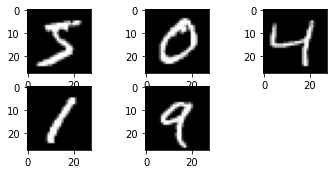

In [4]:
# Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). Compare these to the first five training labels.
## First 5 images
for i in range(5):
    pyplot.subplot(330 + 1 + i) # subplot definition
    pyplot.imshow(data_train[i], cmap=pyplot.get_cmap('gray'))
pyplot.show()

In [5]:
## First 5 labels
pd.DataFrame(target_train[0:5]).set_axis(['label'], axis=1)

,label
0,5
1,0
2,4
3,1
4,9


In [6]:
# Build and train a Keras CNN classifier on the MNIST training set.
K.set_image_data_format("channels_last") # Color channel value last
np.random.seed(0) # Seed
##Setting image info
channel = 1
height = 28
width = 28
##One channel reshape
data_train = data_train.reshape((data_train.shape[0], height, width, channel))
data_test = data_test.reshape((data_test.shape[0], height, width, channel))

In [7]:
## Pixel intensity rescale
features_train = data_train / 255
features_test = data_test / 255
## Target encode
target_train = keras.utils.to_categorical(target_train)
target_test = keras.utils.to_categorical(target_test)
number_of_classes = target_test.shape[1]

In [8]:
## Initiating neural network
network = Sequential()

In [11]:
## Addons to the network
network.add(Conv2D(filters=64,
 kernel_size=(5, 5),
 input_shape=(height, width, channel),
 activation='relu'))

network.add(MaxPooling2D(pool_size=(2, 2)))

network.add(Dropout(0.5))

network.add(Flatten())

network.add(Dense(128, activation="relu"))

network.add(Dropout(0.5))

network.add(Dense(number_of_classes, activation="softmax"))

In [12]:
## Compilation of network
network.compile(loss="categorical_crossentropy", 
 optimizer="rmsprop", 
 metrics=["accuracy"]) 

In [13]:
## Training model
network.fit(features_train, 
 target_train,
 epochs=2, 
 verbose=0,
 batch_size=1000,
 validation_data=(features_test, target_test))

In [14]:
## Show results
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        102464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 10, 10, 64)        0         
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)               819328    
                                                        

In [15]:
## Predictions
pred = network.predict(data_test)
y_preds = np.argmax(pred, axis=1)
y_true = np.argmax(target_test, axis=1)

313/313 [==============================] - 5s 8ms/step


In [16]:
# Report the test accuracy of your model.
accuracy = accuracy_score(y_true, y_preds)
precision = precision_score(y_true, y_preds, average='micro')
recall = recall_score(y_true, y_preds, average='micro')
f1 = f1_score(y_true, y_preds, average='micro')
print(classification_report(y_true, y_preds))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       980
           1       0.98      1.00      0.99      1135
           2       0.99      0.96      0.97      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.98       982
           5       1.00      0.98      0.99       892
           6       0.99      0.98      0.99       958
           7       0.96      0.99      0.97      1028
           8       0.99      0.96      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



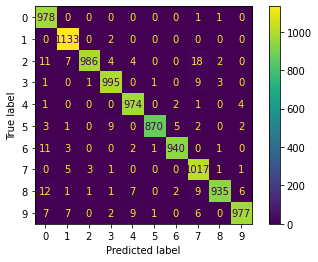

In [17]:
# Display a confusion matrix on the test set classifications.
conf_matrix = confusion_matrix(y_true, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot()
plt.show()

Accuracy of 98% which is highly accurate. the confusion matrix shows mostly the predicted label matching what the true label is and it goes in alignment with the accuracy of the model.